# Process : globColour
_process globColour chlorophyll product_

- **Original**: `/local/data/artemis/observations/GlobColour`
- **Processed**: `/local/data/artemis/observations/GlobColour`
- **Variable**: chl
- **Temporal**: Monthly, 199801 - 201712
- **Spatial**: 1x1 degree, interpolated from native grid
- **todo**: pre-pend with climatology

Laste update : 20 September 2019 L. Gloege

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Observations directory
dir_obs = '/local/data/artemis/observations'

In [3]:
# Load raw data
ds = xr.open_dataset(f'{dir_obs}/GlobColour/originals/L3m_GLOB_CHL1_199801-201712.nc')

In [4]:
# flip latitudes so is in increasing order
ds = ds.sortby('lat')

In [5]:
# roll data so longitude goes from 0-360
ds_rolled = ds.roll(lon=180, roll_coords='lon')

In [6]:
# Make dates vector
dates = pd.date_range(start='1998-01-01T00:00:00.000000000', 
                      end='2017-12-01T00:00:00.000000000',freq='MS')+ np.timedelta64(14, 'D')
da_dates = xr.DataArray(dates, dims='time')
print(f'dates shape = {np.shape(da_dates)}')

dates shape = (240,)


## Store raw data in NetCDF

In [7]:
ds_out = xr.Dataset(
    {
    'chl':(['time','lat', 'lon'], ds_rolled['CHL1_mean'],
           {'long_name':'satellite-retrieved chlorophyll concentration',
            'units':'mg/m3'}),
    },

    coords={
    'lat': (['lat'], ds_rolled['lat'], {'units':'degrees_north'}),
    'lon': (['lon'], np.arange(0.5, 360, 1), {'units':'degrees_east'}),
    'time': (['time'], da_dates)
    },
    attrs={'contact':'Luke Gloege (gloege@ldeo.columbia.edu)',
           'creation_date':'21 September 2019',
           'notes':'original data, no manipulation',
           'original_data':'http://www.globcolour.info/'})

In [8]:
ds_out.info()

xarray.Dataset {
dimensions:
	lat = 180 ;
	lon = 360 ;
	time = 240 ;

variables:
	float32 chl(time, lat, lon) ;
		chl:long_name = satellite-retrieved chlorophyll concentration ;
		chl:units = mg/m3 ;
	float32 lat(lat) ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:units = degrees_east ;
	datetime64[ns] time(time) ;

// global attributes:
	:contact = Luke Gloege (gloege@ldeo.columbia.edu) ;
	:creation_date = 21 September 2019 ;
	:notes = original data, no manipulation ;
	:original_data = http://www.globcolour.info/ ;
}

In [10]:
ds_out.to_netcdf(f'{dir_obs}/GlobColour/processed/chl_1x1_mon_globColour_199801-201712.nc')

## Pre-pend climatology

## Test plot

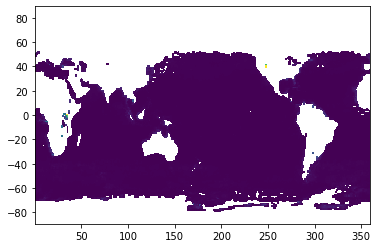

In [9]:
plt.pcolor(ds_out['lon'], ds_out['lat'], ds_out['chl'][0,:,:])